## Observations and Insights 

Sam Vuong Week 5 Homework

Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

1) For mice that took the Capomulin drug, there is a moderately positively correlated relationship (0.53) between mice weight and tumor size, in other words, as tumor size grows, mice weight grows, and the moderate relationship suggests that there is a relationship between the two values.
2) Mice that undertook Capomulin or Ramicane at the end of their regimen (timepoint) on average had a smaller tumor volume than mice that took Infubinol or Ceftamin at the end of their regimen. In fact for both Capomulin and Ramicane, all 25 mice had a lower tumor volume than the lowest tumour volume of any mouse taking Infubinol or Ceftamin, besides for one outlier mouse taking Infubinol. 
3) For a single mouse l897 taking Capomulin, there was one timepoint out of 10 where there was a significant reduction in tumor volume, otherwise there was small changes in tumor volume over the study. this might suggest that capomulin is effective 30 days in, and further intake of the drug hasn't been proven to be effective in reducing tumor size


In [201]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study_results = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="inner")

# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

number_of_mice = mouse_study_results["Mouse ID"].nunique()
print(f"Number of mice: {number_of_mice}")


Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_timepoint = mouse_study_results[mouse_study_results.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice_timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_timepoint_all_values = mouse_study_results.loc[mouse_study_results["Mouse ID"] == "g989", :]
duplicate_mice_timepoint_all_values


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_results_clean = mouse_study_results
mouse_study_results_clean.drop(duplicate_mice_timepoint_all_values.index, inplace=True)
mouse_study_results_clean.to_csv("clean_dataset.csv")
mouse_study_results_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

number_of_mice_clean = mouse_study_results_clean["Mouse ID"].nunique()
print(f"Number of mice in clean data frame: {number_of_mice_clean}")

Number of mice in clean data frame: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

ps_mouse_tumor_mean = mouse_study_results_clean.groupby("Drug Regimen", as_index=True)["Tumor Volume (mm3)"].mean()
ps_mouse_tumor_median = mouse_study_results_clean.groupby("Drug Regimen", as_index=True)["Tumor Volume (mm3)"].median()
ps_mouse_tumor_var = mouse_study_results_clean.groupby("Drug Regimen", as_index=True)["Tumor Volume (mm3)"].var()
ps_mouse_tumor_std = mouse_study_results_clean.groupby("Drug Regimen", as_index=True)["Tumor Volume (mm3)"].std()
ps_mouse_tumor_sem = mouse_study_results_clean.groupby("Drug Regimen", as_index=True)["Tumor Volume (mm3)"].sem()

ps_sum_stats = pd.merge(ps_mouse_tumor_mean,ps_mouse_tumor_median, on="Drug Regimen")
ps_sum_stats = pd.merge(ps_sum_stats,ps_mouse_tumor_var, on="Drug Regimen")
ps_sum_stats = pd.merge(ps_sum_stats,ps_mouse_tumor_std, on="Drug Regimen")
ps_sum_stats = pd.merge(ps_sum_stats,ps_mouse_tumor_sem, on="Drug Regimen")


ps_sum_stats.columns.values[0] = "Mean"
ps_sum_stats.columns.values[1] = "Median"
ps_sum_stats.columns.values[2] = "Variance"
ps_sum_stats.columns.values[3] = "Standard Deviation"
ps_sum_stats.columns.values[4] = "SEM"
ps_sum_stats

c:\Users\Dog\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Tumor Volume (mm3)_x'} in the result is deprecated and will raise a MergeError in a future version.
  del sys.path[0]


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
ps_sum_stats_2 = mouse_study_results_clean.groupby("Drug Regimen",as_index=True)["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
    )

#reset index to put group by list as it's own column
ps_sum_stats_2 = ps_sum_stats_2.reset_index()
ps_sum_stats_2

,Drug Regimen,Mean,Median,Variance,Standard_Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

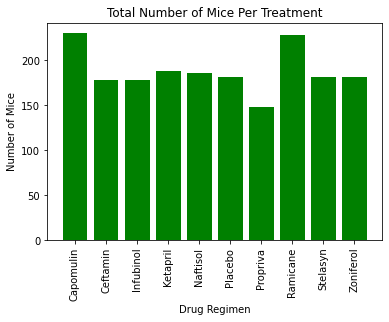

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

ps_treatment_count = mouse_study_results_clean.groupby("Drug Regimen", as_index=True)["Mouse ID"].count()
ps_treatment_count = ps_treatment_count.reset_index()
tick_count = np.arange(len(ps_treatment_count["Drug Regimen"]))


plt.bar(ps_treatment_count["Drug Regimen"], ps_treatment_count["Mouse ID"], color='g', alpha=1, align="center")
plt.xticks(tick_count,ps_treatment_count["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice Per Treatment")
plt.show()

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



array([<AxesSubplot:ylabel='Sex'>], dtype=object)

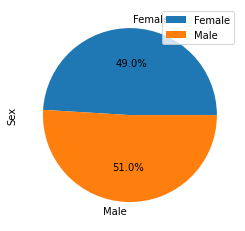

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

ps_gender_count = mouse_study_results_clean.groupby("Sex", as_index=True)["Sex"].count()
ps_gender_count.plot.pie(subplots=True,autopct="%1.1f%%",legend=True)



Text(0, 0.5, 'Sex')

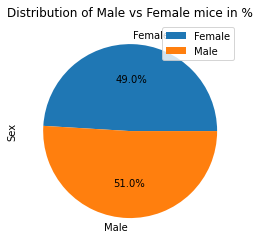

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

ps_gender_count = mouse_study_results_clean.groupby("Sex", as_index=True)["Mouse ID"].count()
ps_gender_count = ps_gender_count.reset_index()

plt.title("Distribution of Male vs Female mice in %")
plt.pie(ps_gender_count["Mouse ID"], labels=ps_gender_count["Sex"],autopct="%1.1f%%")
plt.legend()
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

ps_last_timepoint_mouse = mouse_study_results_clean.groupby("Mouse ID", as_index=True)["Timepoint"].max()
ps_last_timepoint_mouse = ps_last_timepoint_mouse.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

ps_last_timepoint_mouse_data = pd.merge(mouse_study_results_clean,ps_last_timepoint_mouse, on=["Mouse ID", "Timepoint"], how="inner")
ps_last_timepoint_mouse_data 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

ps_last_timepoint_mouse = mouse_study_results_clean.groupby("Mouse ID", as_index=True)["Timepoint"].max()
ps_last_timepoint_mouse = ps_last_timepoint_mouse.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

ps_last_timepoint_mouse_data = pd.merge(mouse_study_results_clean,ps_last_timepoint_mouse, on=["Mouse ID", "Timepoint"], how="inner")
ps_last_timepoint_mouse_data

# creating a table of only the 4 drugs listed (Capomulin, Ramicane, Infubinol, and Ceftamin)
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

ps_last_timepoint_mouse_data_4_drugs = ps_last_timepoint_mouse_data[ps_last_timepoint_mouse_data["Drug Regimen"].isin(drugs_list)]

ps_last_timepoint_mouse_data_4_drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = []

temp_list_treatment = ps_last_timepoint_mouse_data_4_drugs["Drug Regimen"].unique()
for x in temp_list_treatment:
    treatment_list.append(x)
treatment_list

# Create empty list to fill with tumor vol data (for plotting)


tumor_vol_data = []
temp_tumor_vol = ps_last_timepoint_mouse_data_4_drugs["Tumor Volume (mm3)"]
for x in temp_tumor_vol:
    tumor_vol_data.append(x)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capomulin_quartile = ps_last_timepoint_mouse_data_4_drugs[ps_last_timepoint_mouse_data_4_drugs["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartile[0.25]
capomulin_upperq = capomulin_quartile[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5 * capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5 * capomulin_iqr)


ramicane_quartile = ps_last_timepoint_mouse_data_4_drugs[ps_last_timepoint_mouse_data_4_drugs["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartile[0.25]
ramicane_upperq = ramicane_quartile[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5 * ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5 * ramicane_iqr)


infubinol_quartile = ps_last_timepoint_mouse_data_4_drugs[ps_last_timepoint_mouse_data_4_drugs["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartile[0.25]
infubinol_upperq = infubinol_quartile[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5 * infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5 * infubinol_iqr)


ceftamin_quartile = ps_last_timepoint_mouse_data_4_drugs[ps_last_timepoint_mouse_data_4_drugs["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartile[0.25]
ceftamin_upperq = ceftamin_quartile[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5 * ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5 * ceftamin_iqr)



print("Capomulin :")
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.\n ")

print("Ramicane :")
print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.\n")

print("Infubinol :")
print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.\n")

print("Ceftamin :")
print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.\n")


#quantitative outliers, getting values of outliers for each drug 
# creating tables for each drug's results 
#output is messy but it's the best i can do for now
data_capomulin = ps_last_timepoint_mouse_data_4_drugs[ps_last_timepoint_mouse_data_4_drugs["Drug Regimen"] == "Capomulin"]
data_ramicane = ps_last_timepoint_mouse_data_4_drugs[ps_last_timepoint_mouse_data_4_drugs["Drug Regimen"] == "Ramicane"]
data_infubinol = ps_last_timepoint_mouse_data_4_drugs[ps_last_timepoint_mouse_data_4_drugs["Drug Regimen"] == "Infubinol"]
data_ceftamin = ps_last_timepoint_mouse_data_4_drugs[ps_last_timepoint_mouse_data_4_drugs["Drug Regimen"] == "Ceftamin"]

cap_outliers = data_capomulin[(data_capomulin["Tumor Volume (mm3)"] < capomulin_lower_bound) | (data_capomulin["Tumor Volume (mm3)"] > capomulin_upper_bound) ]["Tumor Volume (mm3)"]
ram_outliers = data_ramicane[(data_ramicane["Tumor Volume (mm3)"] < ramicane_lower_bound) | (data_ramicane["Tumor Volume (mm3)"] > ramicane_upper_bound) ]["Tumor Volume (mm3)"]
inf_outliers = data_infubinol[(data_infubinol["Tumor Volume (mm3)"] < infubinol_lower_bound) | (data_infubinol["Tumor Volume (mm3)"] > infubinol_upper_bound) ]["Tumor Volume (mm3)"]
cer_outliers = data_ceftamin[(data_ceftamin["Tumor Volume (mm3)"] < ceftamin_lower_bound) | (data_ceftamin["Tumor Volume (mm3)"] > ceftamin_upper_bound) ]["Tumor Volume (mm3)"]

print(f"Capomulin Outliers: {cap_outliers} \n ")
print(f"Ramicane  Outliers: {ram_outliers} \n ")
print(f"Infubinol  Outliers: {inf_outliers} \n ")
print(f"Ceftamin  Outliers: {cer_outliers} \n ")

    

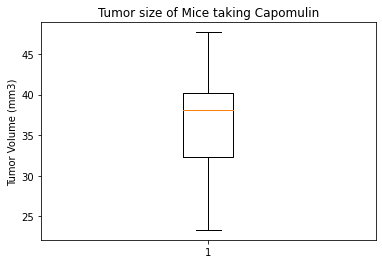

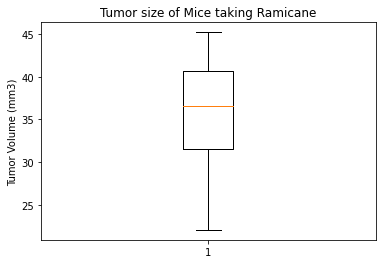

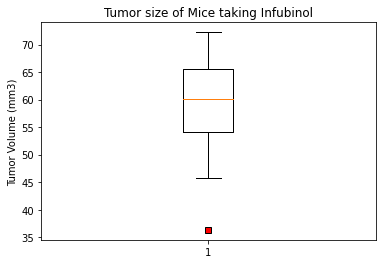

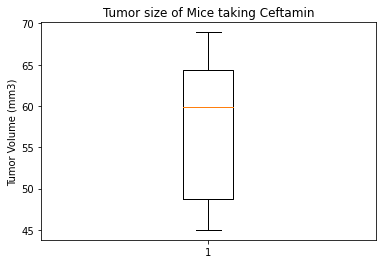

In [98]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#marking outliers as a red square
red_square = dict(markerfacecolor='r', marker='s')

fig1, ax1 = plt.subplots()
ax1.boxplot(data_capomulin["Tumor Volume (mm3)"], flierprops=red_square)
ax1.set_title('Tumor size of Mice taking Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()

fig12, ax2 = plt.subplots()
ax2.boxplot(data_ramicane["Tumor Volume (mm3)"], flierprops=red_square)
ax2.set_title('Tumor size of Mice taking Ramicane')
ax2.set_ylabel('Tumor Volume (mm3)')
plt.show()

fig3, ax3 = plt.subplots()
ax3.boxplot(data_infubinol["Tumor Volume (mm3)"], flierprops=red_square)
ax3.set_title('Tumor size of Mice taking Infubinol')
ax3.set_ylabel('Tumor Volume (mm3)')
plt.show()

fig4, ax4 = plt.subplots()
ax4.boxplot(data_ceftamin["Tumor Volume (mm3)"], flierprops=red_square)
ax4.set_title('Tumor size of Mice taking Ceftamin')
ax4.set_ylabel('Tumor Volume (mm3)')
plt.show()



## Line and Scatter Plots

In [162]:
#homework only referring to mice under Capomulin, so creating a table and list  for that


cap_tumor_vol_data = mouse_study_results_clean[(mouse_study_results_clean["Drug Regimen"] == "Capomulin")]["Tumor Volume (mm3)"].to_list()
cap_timepoint_data = mouse_study_results_clean[(mouse_study_results_clean["Drug Regimen"] == "Capomulin")]["Timepoint"].to_list()
cap_mouse_weight_data = mouse_study_results_clean[(mouse_study_results_clean["Drug Regimen"] == "Capomulin")]["Weight (g)"].to_list()
cap_id_data = mouse_study_results_clean[(mouse_study_results_clean["Drug Regimen"] == "Capomulin")]["Mouse ID"].to_list()





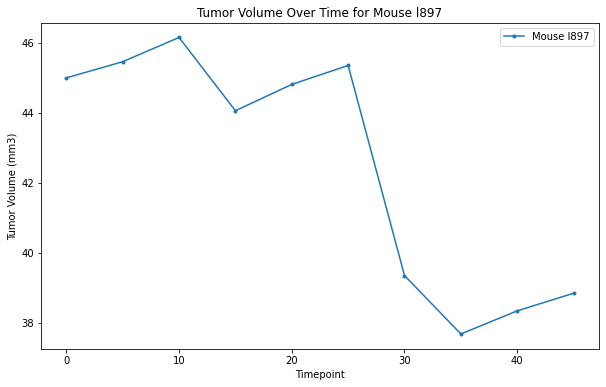

In [163]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#selecting mouse  l897
mouse_l897_data = mouse_study_results_clean[(mouse_study_results_clean["Mouse ID"] == "l897")]
mouse_l897_data.plot(kind="line",figsize=(10,6), x="Timepoint", y="Tumor Volume (mm3)", style='.-',xlabel="Timepoint", ylabel="Tumor Volume (mm3)",label="Mouse l897")

plt.title("Tumor Volume Over Time for Mouse l897")
plt.show()


Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume in mice treated with Capomulin')

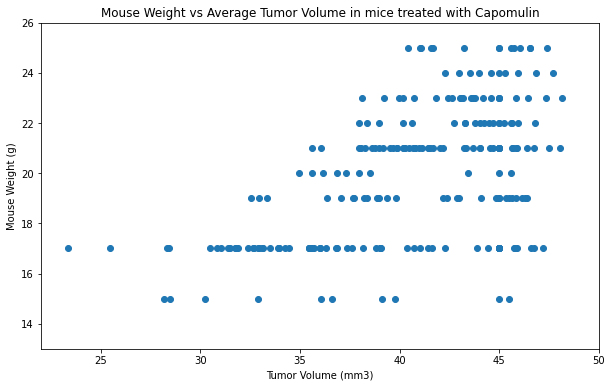

In [221]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#getting average tumor volume for the cap regimen
cap_average_tumor_vol = mouse_study_results_clean[(mouse_study_results_clean["Drug Regimen"] == "Capomulin")]["Tumor Volume (mm3)"].mean()
x_values = cap_tumor_vol_data
y_values = cap_mouse_weight_data
plt.figure(figsize=(10, 6))
plt.xlim(22,50)
plt.ylim(13,26)
plt.scatter(x_values,y_values)

plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.title("Mouse Weight vs Average Tumor Volume in mice treated with Capomulin")




## Correlation and Regression

The correlation coefficient between Mouse Weight and Average Tumor Volume is 0.53


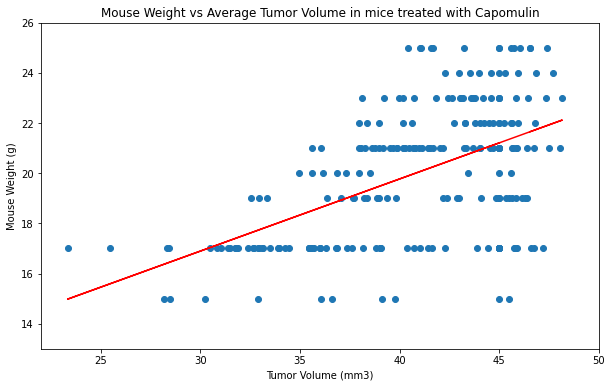

In [219]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between Mouse Weight and Average Tumor Volume is {round(st.pearsonr(cap_mouse_weight_data,cap_tumor_vol_data)[0],2)}")

cap_average_tumor_vol = mouse_study_results_clean[(mouse_study_results_clean["Drug Regimen"] == "Capomulin")]["Tumor Volume (mm3)"].mean()
x_values = cap_tumor_vol_data
y_values = cap_mouse_weight_data
plt.figure(figsize=(10, 6))
plt.xlim(22,50)
plt.ylim(13,26)
plt.scatter(x_values,y_values)

#linear  regression model (credit to lesson 3 activity 8)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = mouse_study_results_clean[(mouse_study_results_clean["Drug Regimen"] == "Capomulin")]["Tumor Volume (mm3)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,6),fontsize=5,color="red")
plt.plot(mouse_study_results_clean[(mouse_study_results_clean["Drug Regimen"] == "Capomulin")]["Tumor Volume (mm3)"],regress_values,"r-")



plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.title("Mouse Weight vs Average Tumor Volume in mice treated with Capomulin")

plt.show()
